# Merger_Rate_Fpbh

**References:** 


**Misao Sasaki :** [arXiv:1801.05235](https://arxiv.org/pdf/1801.05235.pdf) [arXiv:1603.08338v3](https://arxiv.org/pdf/1603.08338v3.pdf)

**Celoria :**  [arXiv:1807.11489](https://arxiv.org/pdf/1807.11489.pdf)

**Resources**
[Ley de probabilidad Poission](http://slittlefair.staff.shef.ac.uk/teaching/phy217/lectures/instruments/L14/index.html#:~:text=The%20vast%20majority%20of%20astronomical,telescope%2C%20they%20are%20randomly%20spaced.&text=This%20random%20bunching%20of%20photons,is%20known%20as%20shot%20noise) , [Calc BH Colitions](https://www.omnicalculator.com/physics/black-hole)
[Raidal et al](https://arxiv.org/pdf/1812.01930.pdf),  [Hardi verm video 117](https://drive.google.com/file/d/1eKe2TcBLCMercIUHm5o5tlkkUxioFpH9/view) , [Slide Verm](https://agenda.infn.it/event/23799/contributions/120834/attachments/78936/102273/Veermae.pdf)

###### Code Writed by Tadeo D.

In [36]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import math
import seaborn as sns
from scipy import stats 
import csv
from scipy import constants
from tqdm import tqdm
from scipy.integrate import quad, dblquad
from astropy.cosmology import Planck18 as cosmo# WMAP9 as cosmo #
from astropy import constants as const
import astropy.units as u
#from astropy.cosmology import WMAP9, z_at_value
import pandas as pd
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
#pl.rcParams['figure.figsize'] = (16, 9)
#pl.style.use('ggplot')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#
#from mlxtend.plotting import plot_linear_regression
from sympy import *

In [38]:
H0 = cosmo.H(0)  #cosmo.H(0)  <Quantity 67.66 km / (Mpc s)>
G = const.G
c = const.c
z_r = 5000 #3450
z_eq = 3411
z_0 = 0
z_init=6.900e9
rho_c0 = (3*(H0**2))/(8*math.pi*G)
rho_c01 = cosmo.critical_density(0)
Omega_DM = cosmo.Odm(0)
Omega_M = cosmo.Om(0)
Omega_lmb = 1-Omega_M-Omega_R
Omega_R = 8.4e-5
#print(Omega_DM,rho_c01, rho_c0.to(u.g/u.cm**3))
#print(G.to((u.pc*u.km**2)/(u.M_sun*u.s**2)))

e_prim = np.arange(0.01,1.0,0.01)
#print(((1/H0)*3.08e+19*u.km/u.megaparsec).to(u.Gyr))
#e = [0.5,  0.2,  0.1,  0.05,  0.01] #Excentricity array of datas
#e = 0.1 #Half
a_s = 0.01*u.AU#Half Separation
separation = a_s.to(u.m)
#a = [0.001, 0.01, 0.1, 1, 7.63] #Separation in AU, the last one is 1pc = 208232 UA
#omega_m = 0.321
#print(cosmo.Odm(0))
#print(cosmo.Odm(z_r))
#print(cosmo.Odm(z_eq))
#print(rho_c0.unit)
#print(rho_c0.to(u.kg/u.m**3),"\t\t\t", rho_c01)
#print(rho_c0.to(u.M_sun/u.m**3)*(Omega_DM)/(30*u.M_sun))
#G_N = G.to((u.pc*u.km**2)/(u.M_sun*u.s**2))
#h = 0.678
#H0 = (100.0*h)*(u.km/(u.megaparsec*u.s)) #(km/s) Mpc^-1
#Omega_DM = 0.1186/(h**2)
#rho = (3.0*H0**2/(8.0*np.pi*(G_N*1e-6))).to(u.M_sun/u.megaparsec**3)
#print(Omega_lmb)

### Merger event rate R per unit volume per unit time (at time t) is given by:

From this equation, we can express a as a function of t and e as a = a(t,e). Then, we can rewrite
the probability (140) as
$$dP = \frac{4\pi^{2}}{3}n_{pbh}^{1/2}(1+z_{eq})^{3/2}f_{pbh}^{3/2}a^{1/2}e(1-e^{2})^{-3/2}\frac{\partial{a}}{\partial{t}} dtde$$

Using: $$ a = \left(\frac{\mathcal{Q^{-1}}\;t}{(1-e^{2})^{7/2}}\right)^{\frac{1}{4}} \implies \frac{\partial{a}}{\partial{t}} = \frac{1}{4t}\left(\frac{Q^{-1}t}{(1-e^{2})^{7/2}}\right)^{\frac{1}{4}} = \frac{a (t,e)}{4t}$$

$$dP \;\;  =  \;\; \frac{4\pi^{2}}{3}n_{pbh}^{1/2}(1+z_{eq})^{3/2}f_{pbh}^{3/2}\frac{a^{3/2}}{4t}e(1-e^{2})^{-3/2}dtde \;\;\; = \;\;\;  \frac{4\pi^{2}}{3}n_{pbh}^{1/2}(1+z_{eq})^{3/2}f_{pbh}^{3/2}\frac{(\mathcal{Q}^{-1}\;t)^{3/8}}{4t}dt \int\limits_{0}^{e_{upper}}\frac{e}{(1-e^{2})^{45/16}}\;de $$

$$dP = \frac{3}{58}\left(\frac{t}{T}\right)^{\frac{3}{8}}\left[\frac{1}{(1-e^{2}_{upper})^{\frac{25}{16}}} - 1 \right]\frac{dt}{t} \;\;\;\;\;\;\;\;\;\; T = \mathcal{Q}\left(\frac{3y_{max}}{4 \pi f_{PBH} (1 + z_{eq})}\right)^{4} \;\;\;\;\;\; \mathcal{y}_{max} = \left(\frac{4\pi}{3}n_{PBH}\right)^{-1/3} $$

$$dP = \frac{3}{58}T^{-3/8}\left[\frac{1}{(1-e^{2}_{upper})^{\frac{25}{16}}} - 1 \right]\int\limits_{0}^{t}\frac{dt}{t^{5/8}}$$

$$\mathcal{R} = n_{PBH}\frac{dP}{dt} = \frac{3n_{PBH}}{58}\left(\frac{t}{T}\right)^{\frac{3}{8}}\left[\frac{1}{(1-e^{2}_{upper})^{\frac{25}{16}}} - 1 \right]\frac{1}{t} $$

In [39]:
f_pbhe = np.arange(-4.0,0.0,0.01)
f_pbh = 10**f_pbhe
#f_pbh = np.arange(0.0001,1.0,0.0001)
print("fpbh \t\t\t  T \t\t\t\t   t_c \t\t\t\t   E_Rate")
t = 14.0*u.Gyr
Mpbh=30*const.M_sun
Q = (3/170)*((c**5)/(Mpbh**(3)*(G**3)))
alpha = 1.5
E_array=[]
E_array2=[]
for i in f_pbh:
    x_barra = (1/((1+z_eq)*(i**(1/3))))*((8*math.pi*G*Mpbh)/(3*(H0**2)*Omega_DM))**(1/3)
    T = (x_barra**4)*(Q)/(i**4)
    tc = Q*(x_barra**4)*(i**(25/3))
    if t<tc:
        #e_up = (1 - (t/T)**(6/37))**(1/2)
        E_rate = ((i*Omega_DM*rho_c0/Mpbh)*(3/58)*(-(t/T)**(3/8) + (t/T)**(3/37))*(1/t)).to(1/(u.Gpc**3 * u.yr))
    if t>=tc:
        #e_up = (1 - ((i**2)*(t/tc)**(2/7)))**(1/2)
        E_rate = ((i*Omega_DM*rho_c0/Mpbh)*(3/58)*(t/T)**(3/8)*(-1 + (t/tc)**(-29/56)*i**(-29/8))*(1/t)).to(1/(u.Gpc**3 * u.yr))
    E_rate_2 = 2*alpha*i**(53/21)
    E_array.append(E_rate.value)
    E_array2.append(E_rate_2)
    print (i,"||", T.to(u.Gyr),"||" ,tc.to(u.Gyr), "||", E_rate.value)

fpbh 			  T 				   t_c 				   E_Rate
0.0001 || 2.709917637739207e+44 Gyr || 1.2578323447340562e-05 Gyr || 0.00558169584917423
0.00010232929922807536 || 2.3967501226743677e+44 Gyr || 1.4778241463518915e-05 Gyr || 0.005980894858354791
0.00010471285480508985 || 2.1197733357431344e+44 Gyr || 1.73629197617943e-05 Gyr || 0.006408644303323492
0.00010715193052376048 || 1.8748049504274826e+44 Gyr || 2.0399651974743296e-05 Gyr || 0.00686698609141212
0.00010964781961431828 || 1.6581459644199009e+44 Gyr || 2.396750122674315e-05 Gyr || 0.007358108165746211
0.00011220184543019607 || 1.466524844995258e+44 Gyr || 2.8159358589310632e-05 Gyr || 0.00788435494962353
0.00011481536214968794 || 1.2970481291378823e+44 Gyr || 3.308436155524636e-05 Gyr || 0.008448238537867272
0.00011748975549395255 || 1.1471567324899448e+44 Gyr || 3.8870735497994186e-05 Gyr || 0.009052450688577102
0.00012022644346174082 || 1.0145873073898196e+44 Gyr || 4.566913209529441e-05 Gyr || 0.009699875672521811
0.00012302687708123762 || 

0.0007943282347242464 || 4.294930016184183e+39 Gyr || 25.097054759960315 Gyr || 2.4547033189467444
0.0008128305161640629 || 3.798592953457839e+39 Gyr || 29.48646827366077 Gyr || 2.5370167475618963
0.0008317637711026335 || 3.359614329380673e+39 Gyr || 34.64357947852594 Gyr || 2.6220903877586434
0.0008511380382023377 || 2.9713656031256105e+39 Gyr || 40.70265682367326 Gyr || 2.7100167975570235
0.0008709635899560405 || 2.627984251116587e+39 Gyr || 47.8214519816763 Gyr || 2.8008916387199645
0.000891250938133704 || 2.324285243408621e+39 Gyr || 56.185307006929406 Gyr || 2.894813780830921
0.0009120108393558668 || 2.0556827501655374e+39 Gyr || 66.01197982596793 Gyr || 2.991885408861538
0.0009332543007969466 || 1.8181208960096768e+39 Gyr || 77.55731369424697 Gyr || 3.0922121343463838
0.00095499258602139 || 1.6080125166399555e+39 Gyr || 91.12189822704862 Gyr || 3.1959031102856796
0.0009772372209557632 || 1.4221849929483464e+39 Gyr || 107.05889542840772 Gyr || 3.3030711499010863
0.0009999999999999

0.006309573444801375 || 6.807005344748818e+34 Gyr || 50075207.57924378 Gyr || 47.77362529861179
0.006456542290345982 || 6.020364112867504e+34 Gyr || 58833238.94794271 Gyr || 49.37561559406388
0.00660693448007537 || 5.324629879931488e+34 Gyr || 69123028.5891107 Gyr || 51.031325340159874
0.00676082975391921 || 4.709297116708002e+34 Gyr || 81212477.27936113 Gyr || 52.74255590822185
0.00691830970918874 || 4.1650743494906815e+34 Gyr || 95416340.98610318 Gyr || 54.51116907485526
0.007079457843840736 || 3.6837438596170166e+34 Gyr || 112104425.72584866 Gyr || 56.33908904751588
0.007244359600749239 || 3.2580375965978745e+34 Gyr || 131711215.68319933 Gyr || 58.228304557999955
0.007413102413008495 || 2.8815274311577174e+34 Gyr || 154747185.26430333 Gyr || 60.18087102613541
0.007585775750291138 || 2.5485280910155295e+34 Gyr || 181812089.6008037 Gyr || 62.1989127960277
0.0077624711662861974 || 2.2540113137447206e+34 Gyr || 213610579.5304302 Gyr || 64.28462544729385
0.007943282347242075 || 1.9935299

0.11481536214967103 || 1.2970481291389022e+28 Gyr || 3.3084361555212412e+16 Gyr || 3048.2673804250358
0.11748975549393526 || 1.147156732490847e+28 Gyr || 3.887073549795433e+16 Gyr || 3150.484758025537
0.12022644346172312 || 1.0145873073906167e+28 Gyr || 4.5669132095247544e+16 Gyr || 3256.1297851136296
0.1230268770812195 || 8.97338066510764e+27 Gyr || 5.3656551634916536e+16 Gyr || 3365.3174008601713
0.12589254117939758 || 7.936385560353426e+27 Gyr || 6.304095132234984e+16 Gyr || 3478.1663986842827
0.12882495516929374 || 7.019229219540853e+27 Gyr || 7.406665956969048e+16 Gyr || 3594.7995554975996
0.13182567385562052 || 6.208062657966675e+27 Gyr || 8.702073723096747e+16 Gyr || 3715.34376528247
0.13489628825914463 || 5.49063732780639e+27 Gyr || 1.0224045140169862e+17 Gyr || 3839.930177149409
0.1380384264602672 || 4.8561201660575536e+27 Gyr || 1.2012205636776907e+17 Gyr || 3968.694338024034
0.14125375446225358 || 4.2949300161867175e+27 Gyr || 1.4113111032079978e+17 Gyr || 4101.776340118702


The result for: 
$$ M_{PBH} = 30 M\odot $$ is given by $$R \approx 2\alpha f_{PBH}^{\frac{53}{21}}$$ 

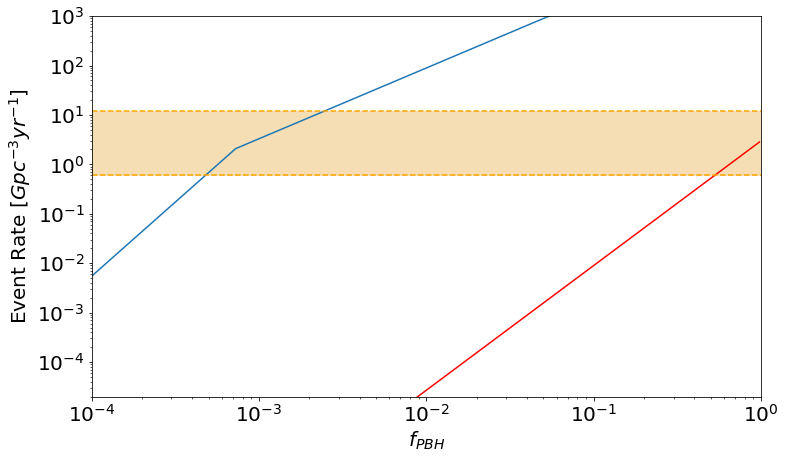

In [30]:
fig= pl.figure(figsize=(12,7))
pl.plot(f_pbh, E_array, "-")
pl.plot(f_pbh, E_array2, "-", color="red")
pl.ylim(0.00002,1000)
pl.xlim(0.0001,1.0)
pl.xticks(fontsize=20)
pl.yticks(fontsize=20)
pl.xscale("log")
pl.yscale("log")
pl.xlabel("$f_{PBH}$", fontsize=20)
pl.ylabel("Event Rate [$Gpc^{-3} yr^{-1}$]", fontsize=20)
pl.axhline(0.6, color="orange", linestyle="dashed")
pl.axhline(12.0, color="orange", linestyle="dashed")
pl.axhspan(0.6, 12.0, color="wheat")
pl.show()

In [119]:
z_22=64.900e6
H_t = (1/cosmo.H(z_22)).to(u.s)
rH = c/cosmo.H(z_22)
print(H_t)
print(rH.to(u.AU))
#print(rH.to(u.km))

11325.813150912372 s
22.696802751756984 AU


In [120]:
l_pbh = 22*u.AU #(Mpbh/(fpbh*Omega_DM*rho_c0))**(1/3)
z_20=64.900e6
M_pbh=1.0*const.M_sun
Qc = (3/170)*((c**5)/(M_pbh**(3)*(G**3)))
f = ((1/(l_pbh*(1+z_20))**(3))*(M_pbh/(Omega_DM*rho_c0))).to(u.AU**5/u.AU**5)
e=0.99988
#f=1.0
npbh = (f*Omega_DM*rho_c0)/M_pbh
print("Masses: ", (M_pbh/const.M_sun)*u.M_sun)
print("Separation: ", l_pbh)
print("Fpbh: ", f)
#print("Q: ", Qc)

#Q = (3/170)*c**5/(Mpbh**(3)*(G**3))
#t_coal1 = Qc * (l_pbh**(4)) * (1-(e**(2)))**(7/2)#((4*math.pi*npbh/3)**(2)*((1+z_eq)*M_pbh*l_pbh/(rho_c0*Omega_DM))**(3/2))**(7/2)
#print(t_coal1.to(u.Gyr))
#print(prueba.to(u.Gyr))


#x_b = (1/(1+z_eq))*((8*math.pi*G*Mpbh)/(3*(H0**2)*Omega_DM))**(1/3)
#prueba = Q*(lpbh**(4))*((lpbh*(1+z_eq))**(3/2) * (rho_c01*Omega_DM/Mpbh)**(1/2))**(7/2)
#x_b = (1/(1+z_eq))*(M_pbh/(f*rho_c0*Omega_DM))**(1/3)
t_coal2 = l_pbh**(4) * Qc * (1-(e**2))**(7/2)#((f*l_pbh/x_b)**(21/4))
print(t_coal2.to(u.Gyr))
#print(prueba.to(u.Gyr))

Masses:  1.0 solMass
Separation:  22.0 AU
Fpbh:  9.102581611063082e-05
14.553836501429032 Gyr


In [121]:
f=1.0
M_pbh=1.0*const.M_sun
e=np.arange(1.0,0.90,-0.0001)
Qc = (3/170)*((c**5)/(M_pbh**(3)*(G**3)))
l_pbh = ((M_pbh/(f*Omega_DM*rho_c0))**(1/3)).to(u.AU)
etha = (l_pbh*H0/c).to(u.AU/u.AU)
z1 = (-(etha**(2) * Omega_M) + math.sqrt(((etha**(2))*Omega_M)**(2) + (4*(etha**(2))*Omega_R)))/(2*etha**(2)*Omega_R)
#z2 = (-(etha**(2) * Omega_M) - math.sqrt((etha**(2)*Omega_M)**(2) + (4*(etha**(2))*Omega_R)))/(2*etha**(2)*Omega_R)
lpbh_z = (l_pbh*(1/(1+z1)))
print("input:")
print("\n")
print("Fraction PBHs:\t", f)
print("Masses PBHs:\t", M_pbh*u.M_sun/const.M_sun)
print("Redshift:\t %.0f" %z1)
print("l_PBH(z):\t", lpbh_z)
print("Hubble Time:\t",(1/cosmo.H(z1)).to(u.s))
print("\n")
print("e(value)|\t Coalesence's Time")
print("--------------------------------------------")
for i in e:
    t_coal= lpbh_z**(4) * Qc * (1-(i**2))**(7/2)
    print("%.4f" %i, "\t|\t", t_coal.to(u.Gyr))

input:


Fraction PBHs:	 1.0
Masses PBHs:	 1.0 solMass
Redshift:	 1552570891
l_PBH(z):	 0.04136859824079727 AU
Hubble Time:	 19.790956454368583 s


e(value)|	 Coalesence's Time
--------------------------------------------
1.0000 	|	 0.0 Gyr
0.9999 	|	 9.612820423921862e-11 Gyr
0.9998 	|	 1.0873761595397886e-09 Gyr
0.9997 	|	 4.4938979152239954e-09 Gyr
0.9996 	|	 1.2297951215543213e-08 Gyr
0.9995 	|	 2.6849845610885832e-08 Gyr
0.9994 	|	 5.081595964673303e-08 Gyr
0.9993 	|	 8.714407592342366e-08 Gyr
0.9992 	|	 1.3903804525592728e-07 Gyr
0.9991 	|	 2.0993818976657862e-07 Gyr
0.9990 	|	 3.0350554320069014e-07 Gyr
0.9989 	|	 4.236088102303738e-07 Gyr
0.9988 	|	 5.743133370593464e-07 Gyr
0.9987 	|	 7.598716201618556e-07 Gyr
0.9986 	|	 9.847150229454882e-07 Gyr
0.9985 	|	 1.253446461832085e-06 Gyr
0.9984 	|	 1.5708338845476908e-06 Gyr
0.9983 	|	 1.9418044057958467e-06 Gyr
0.9982 	|	 2.3714389956549428e-06 Gyr
0.9981 	|	 2.8649676380306556e-06 Gyr
0.9980 	|	 3.427764892875601e-06 Gyr
0.9979 	

0.9754 	|	 0.021497472193219264 Gyr
0.9753 	|	 0.021801024725723293 Gyr
0.9752 	|	 0.022107595009589517 Gyr
0.9751 	|	 0.022417200404442335 Gyr
0.9750 	|	 0.022729858295197258 Gyr
0.9749 	|	 0.023045586091954125 Gyr
0.9748 	|	 0.023364401229890794 Gyr
0.9747 	|	 0.023686321169157316 Gyr
0.9746 	|	 0.024011363394771473 Gyr
0.9745 	|	 0.02433954541651288 Gyr
0.9744 	|	 0.024670884768820192 Gyr
0.9743 	|	 0.025005399010686824 Gyr
0.9742 	|	 0.02534310572555831 Gyr
0.9741 	|	 0.025684022521228998 Gyr
0.9740 	|	 0.02602816702974108 Gyr
0.9739 	|	 0.02637555690728309 Gyr
0.9738 	|	 0.02672620983408797 Gyr
0.9737 	|	 0.027080143514333396 Gyr
0.9736 	|	 0.02743737567604141 Gyr
0.9735 	|	 0.027797924070979783 Gyr
0.9734 	|	 0.028161806474561582 Gyr
0.9733 	|	 0.028529040685748124 Gyr
0.9732 	|	 0.02889964452695015 Gyr
0.9731 	|	 0.029273635843930487 Gyr
0.9730 	|	 0.029651032505706974 Gyr
0.9729 	|	 0.0300318524044559 Gyr
0.9728 	|	 0.030416113455415852 Gyr
0.9727 	|	 0.030803833596792035 Gyr
0

0.9496 	|	 0.25271908016029426 Gyr
0.9495 	|	 0.2544327486964308 Gyr
0.9494 	|	 0.2561545195946518 Gyr
0.9493 	|	 0.2578844142083555 Gyr
0.9492 	|	 0.2596224538991393 Gyr
0.9491 	|	 0.2613686600367646 Gyr
0.9490 	|	 0.2631230539991073 Gyr
0.9489 	|	 0.26488565717212154 Gyr
0.9488 	|	 0.2666564909497943 Gyr
0.9487 	|	 0.26843557673410406 Gyr
0.9486 	|	 0.2702229359349788 Gyr
0.9485 	|	 0.27201858997025335 Gyr
0.9484 	|	 0.27382256026563156 Gyr
0.9483 	|	 0.2756348682546387 Gyr
0.9482 	|	 0.2774555353785828 Gyr
0.9481 	|	 0.27928458308651566 Gyr
0.9480 	|	 0.2811220328351891 Gyr
0.9479 	|	 0.28296790608901096 Gyr
0.9478 	|	 0.28482222432001003 Gyr
0.9477 	|	 0.2866850090077911 Gyr
0.9476 	|	 0.28855628163949476 Gyr
0.9475 	|	 0.29043606370975716 Gyr
0.9474 	|	 0.29232437672066774 Gyr
0.9473 	|	 0.29422124218173334 Gyr
0.9472 	|	 0.2961266816098298 Gyr
0.9471 	|	 0.2980407165291708 Gyr
0.9470 	|	 0.2999633684712582 Gyr
0.9469 	|	 0.3018946589748499 Gyr
0.9468 	|	 0.3038346095859157 Gyr
0.

0.9255 	|	 0.9501039703800535 Gyr
0.9254 	|	 0.9544015375622288 Gyr
0.9253 	|	 0.9587125052168173 Gyr
0.9252 	|	 0.9630368956486741 Gyr
0.9251 	|	 0.9673747311629981 Gyr
0.9250 	|	 0.9717260340653134 Gyr
0.9249 	|	 0.9760908266614509 Gyr
0.9248 	|	 0.9804691312575172 Gyr
0.9247 	|	 0.9848609701598622 Gyr
0.9246 	|	 0.9892663656750701 Gyr
0.9245 	|	 0.9936853401099238 Gyr
0.9244 	|	 0.9981179157713835 Gyr
0.9243 	|	 1.0025641149665607 Gyr
0.9242 	|	 1.0070239600026925 Gyr
0.9241 	|	 1.0114974731871267 Gyr
0.9240 	|	 1.015984676827278 Gyr
0.9239 	|	 1.020485593230627 Gyr
0.9238 	|	 1.0250002447046718 Gyr
0.9237 	|	 1.0295286535569244 Gyr
0.9236 	|	 1.034070842094877 Gyr
0.9235 	|	 1.0386268326259698 Gyr
0.9234 	|	 1.043196647457584 Gyr
0.9233 	|	 1.0477803088970021 Gyr
0.9232 	|	 1.0523778392513996 Gyr
0.9231 	|	 1.0569892608278022 Gyr
0.9230 	|	 1.061614595933072 Gyr
0.9229 	|	 1.0662538668738903 Gyr
0.9228 	|	 1.0709070959567146 Gyr
0.9227 	|	 1.0755743054877778 Gyr
0.9226 	|	 1.080255

In [117]:
#(1+z1)**(2)*((etha**(2)*Omega_R)*(1+z1)**(2) + (etha**(2)*Omega_M)*(1+z1) - 1)*etha**(2)*Omega_lmb

<Quantity 1.05854159e-05>

fpbh 			  T 				   t_c 				   E_Rate
0.0001 || 2.709917637739207e+44 Gyr || 1.257832344734056e-05 Gyr || 0.00015088963286361739
0.00010964781961431851 || 1.658145964419881e+44 Gyr || 2.396750122674349e-05 Gyr || 0.00019891127530076604
0.00012022644346174131 || 1.0145873073897966e+44 Gyr || 4.5669132095295666e-05 Gyr || 0.0002622161290400834
0.00013182567385564074 || 6.208062657961598e+43 Gyr || 8.702073723106056e-05 Gyr || 0.0003456681790652664
0.0001445439770745928 || 3.7985929534569276e+43 Gyr || 0.00016581459644198786 Gyr || 0.0004556794063573102
0.00015848931924611142 || 2.3242852434080376e+43 Gyr || 0.0003159531999851366 Gyr || 0.0006007024480519078
0.00017378008287493763 || 1.4221849929479734e+43 Gyr || 0.000602036411286464 Gyr || 0.0007918800500117574
0.00019054607179632481 || 8.702073723106066e+42 Gyr || 0.0011471567324899228 Gyr || 0.0010439012120563842
0.0002089296130854041 || 5.324629879928936e+42 Gyr || 0.0021858620911066238 Gyr || 0.0013761298071805301
0.000229086765276777

0.20892961308540536 || 5.3246298799287686e+26 Gyr || 2.185862091106728e+18 Gyr || 659.8599702739702
0.22908676527677888 || 3.258037596596165e+26 Gyr || 4.16507434948887e+18 Gyr || 768.0645311833899
0.25118864315095973 || 1.993529920426344e+26 Gyr || 7.936385560347367e+18 Gyr || 894.0125893674241
0.27542287033381857 || 1.2198022354889533e+26 Gyr || 1.5122470927852648e+19 Gyr || 1040.613740441516
0.30199517204020376 || 7.463732941543405e+25 Gyr || 2.8815274311564485e+19 Gyr || 1211.2546977764082
0.3311311214825935 || 4.566913209529412e+25 Gyr || 5.49063732780216e+19 Gyr || 1409.8775304577669
0.36307805477010396 || 2.79440548405546e+25 Gyr || 1.0462193744709716e+20 Gyr || 1641.0707306845277
0.3981071705535002 || 1.709842436467903e+25 Gyr || 1.9935299204265207e+20 Gyr || 1910.1752143991885
0.4365158322401692 || 1.0462193744708774e+25 Gyr || 3.7985929534571296e+20 Gyr || 2223.407703785675
0.4786300923226419 || 6.40161313213952e+24 Gyr || 7.238069656344564e+20 Gyr || 2588.0043419613294
0.524

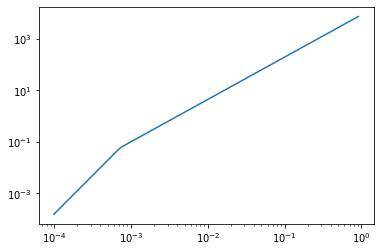

In [21]:
f_pbhe = np.arange(-4.0,0.0,0.04)
f_pbh = 10**f_pbhe
print("fpbh \t\t\t  T \t\t\t\t   t_c \t\t\t\t   E_Rate")
t = 14.0*u.Gyr
Mpbh=30*const.M_sun
Q = (3/170)*c**5/(Mpbh**(3)*(G**3))
E_array=[]
for i in f_pbh:
    x_barra = (1/((1+z_eq)*(i**(1/3))))*((8*math.pi*G*Mpbh)/(3*(H0**2)*Omega_DM))**(1/3)
    T = (x_barra**4)*(Q)/(i**4)
    tc = Q*(x_barra**4)*(i**(25/3))
    if t<tc:
        e_up = (1 - (t/T)**(6/37))**(1/2)
        E_rate = ((3/58) * ((i*Omega_DM*rho_c0/Mpbh)) * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)).to(1/(u.Gpc**3 * u.yr))
    if t>=tc:
        e_up = (1 - ((i**2)*(t/tc)**(2/7)))**(1/2)
        E_rate = ((3/58) * ((i*Omega_DM*rho_c0/Mpbh)) * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)).to(1/(u.Gpc**3 * u.yr))
    E_array.append(E_rate.value)
    print (i,"||", T.to(u.Gyr),"||" ,tc.to(u.Gyr), "||", E_rate.value)
pl.plot(f_pbh, E_array, "-")
pl.xscale("log")
pl.yscale("log")
pl.show()

fpbh 			  T 				   t_c 				   E_Rate
0.0001 || 1.3036174803236127e+41 Gyr || 0.28460532622063944 Gyr || 0.002647503972603583
0.00010964781961431851 || 7.976582144205501e+40 Gyr || 0.5423042692365446 Gyr || 0.003490089952239533
0.00012022644346174131 || 4.880715674928167e+40 Gyr || 1.0333394822140007 Gyr || 0.004600834597707772
0.00013182567385564074 || 2.986415117255989e+40 Gyr || 1.9689877916792586 Gyr || 0.006065081211411728
0.0001445439770745928 || 1.8273294013805395e+40 Gyr || 3.751828891194038 Gyr || 0.007995334176835367
0.00015848931924611142 || 1.1181073662049556e+40 Gyr || 7.148962572689839 Gyr || 0.010539903155623576
0.00017378008287493763 || 6.841481789858412e+39 Gyr || 13.622067356449996 Gyr || 0.013894298358632717
0.00019054607179632481 || 4.186169816574173e+39 Gyr || 25.956314245164883 Gyr || 0.016258368779976846
0.0002089296130854041 || 2.561435997560299e+39 Gyr || 49.45873717727157 Gyr || 0.018924434735351516
0.00022908676527677748 || 1.5672929329386384e+39 Gyr || 94.241

0.22908676527677888 || 1.567292932938588e+23 Gyr || 9.424168085136403e+22 Gyr || 1944.973477450466
0.25118864315095973 || 9.58996102178225e+22 Gyr || 1.7957382085710343e+23 Gyr || 2263.911681262891
0.27542287033381857 || 5.867910871445652e+22 Gyr || 3.421708616177802e+23 Gyr || 2635.1494901093142
0.30199517204020376 || 3.590460682480538e+22 Gyr || 6.519931356443182e+23 Gyr || 3067.2629744847904
0.3311311214825935 || 2.1969331496104684e+22 Gyr || 1.242347308351933e+24 Gyr || 3570.2344936991612
0.36307805477010396 || 1.344260720471918e+22 Gyr || 2.3672439941319815e+24 Gyr || 4155.6832927721325
0.3981071705535002 || 8.22527023602915e+21 Gyr || 4.5106904406529165e+24 Gyr || 4837.133910310858
0.4365158322401692 || 5.032883087735841e+21 Gyr || 8.594943445556483e+24 Gyr || 5630.3285968852415
0.4786300923226419 || 3.079523401415417e+21 Gyr || 1.6377327108623547e+25 Gyr || 6553.590959711367
0.5248074602497765 || 1.8843005518992722e+21 Gyr || 3.120635347071681e+25 Gyr || 7628.249232411595
0.5754

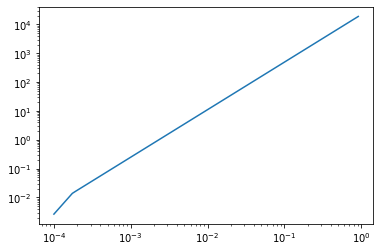

In [23]:
f_pbhe = np.arange(-4.0,0.0,0.04)
f_pbh = 10**f_pbhe
#f_pbh = np.arange(0.0001, 1.0, 0.001)
print("fpbh \t\t\t  T \t\t\t\t   t_c \t\t\t\t   E_Rate")
t = 14.0*u.Gyr
Mpbh=30*const.M_sun
Q = (3/170)*(c**5/((Mpbh**(3))* (G**3)))
E_array=[]
for i in f_pbh:
    T = Q*(3*((4*math.pi/3)*(i*Omega_DM*rho_c0/Mpbh))**(-1/3)/(4*math.pi*i*(1+z_eq)))**4
    t_c = T*((4*math.pi*i/3)**(37/3))
    if t<t_c:
        e_up = (1 - (t/T)**(6/37))**(1/2)
        E_rate = ((3/58) * ((i*Omega_DM*rho_c0/Mpbh)) * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)).to(1/(u.Gpc**3 * u.yr))
    if t>=t_c:
        e_up = (1 - (((4*np.pi*i/3)**2) * (t/t_c)**(2/7)))**(1/2)
        E_rate = ((3/58) * ((i*Omega_DM*rho_c0/Mpbh)) * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)).to(1/(u.Gpc**3 * u.yr))
    E_array.append(E_rate.value)
    print (i,"||", T.to(u.Gyr),"||" ,t_c.to(u.Gyr), "||", E_rate.value)
pl.plot(f_pbh, E_array, "-")
pl.xscale("log")
pl.yscale("log")
pl.show()

In [3]:
f_pbhe = np.arange(-4.0,0.0,0.04)
f_pbh = 10**f_pbhe
print("fpbh \t\t\t  T \t\t\t\t   t_c \t\t\t\t   E_Rate")
t = 14.0*u.Gyr
Mpbh=30*const.M_sun
Q = (3/170)*(c**5/((Mpbh**(3))* (G**3)))
E_array=[]
for i in f_pbh:
    T = Q*(3*((4*math.pi/3)*(i*Omega_DM*rho_c0/Mpbh))**(-1/3)/(4*math.pi*i*(1+z_eq)))**4
    t_c = T*((4*math.pi*i/3)**(37/3))
    if t<t_c:
        e_up = (1 - (t/T)**(6/37))**(1/2)
        E_rate = ((3/58) * ((i*Omega_DM*rho_c0/Mpbh)) * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)).to(1/(u.Gpc**3 * u.yr))
    if t>=t_c:
        e_up = (1 - (4*math.pi*i/3)**2 * (t/t_c)**(2/7))**(1/2)
        E_rate = ((3/58) * ((i*Omega_DM*rho_c0/Mpbh)) * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)).to(1/(u.Gpc**3 * u.yr))
    E_array.append(E_rate.value)
    print (i,"||", T.to(u.Gyr),"||" ,t_c.to(u.Gyr), "||", E_rate.value)

fpbh 			  T 				   t_c 				   E_Rate
0.0001 || 1.3036174803236127e+41 Gyr || 0.28460532622063944 Gyr || 0.002647503972603583
0.00010964781961431851 || 7.976582144205501e+40 Gyr || 0.5423042692365446 Gyr || 0.003490089952239533
0.00012022644346174131 || 4.880715674928167e+40 Gyr || 1.0333394822140007 Gyr || 0.004600834597707772
0.00013182567385564074 || 2.986415117255989e+40 Gyr || 1.9689877916792586 Gyr || 0.006065081211411728
0.0001445439770745928 || 1.8273294013805395e+40 Gyr || 3.751828891194038 Gyr || 0.007995334176835367
0.00015848931924611142 || 1.1181073662049556e+40 Gyr || 7.148962572689839 Gyr || 0.010539903155623576
0.00017378008287493763 || 6.841481789858412e+39 Gyr || 13.622067356449996 Gyr || 0.013894298358632717
0.00019054607179632481 || 4.186169816574173e+39 Gyr || 25.956314245164883 Gyr || 0.016258368779976846
0.0002089296130854041 || 2.561435997560299e+39 Gyr || 49.45873717727157 Gyr || 0.018924434735351516
0.00022908676527677748 || 1.5672929329386384e+39 Gyr || 94.241

0.3311311214825935 || 2.1969331496104684e+22 Gyr || 1.242347308351933e+24 Gyr || 3570.2344936991612
0.36307805477010396 || 1.344260720471918e+22 Gyr || 2.3672439941319815e+24 Gyr || 4155.6832927721325
0.3981071705535002 || 8.22527023602915e+21 Gyr || 4.5106904406529165e+24 Gyr || 4837.133910310858
0.4365158322401692 || 5.032883087735841e+21 Gyr || 8.594943445556483e+24 Gyr || 5630.3285968852415
0.4786300923226419 || 3.079523401415417e+21 Gyr || 1.6377327108623547e+25 Gyr || 6553.590959711367
0.5248074602497765 || 1.8843005518992722e+21 Gyr || 3.120635347071681e+25 Gyr || 7628.249232411595
0.5754399373371614 || 1.1529669065856013e+21 Gyr || 5.946248068932695e+25 Gyr || 8879.12894533541
0.6309573444801981 || 7.05478054624395e+20 Gyr || 1.133034211461608e+26 Gyr || 10335.126374478039
0.691830970918942 || 4.3166831824384976e+20 Gyr || 2.15895218204856e+26 Gyr || 12029.876011840912
0.7585775750291898 || 2.641294591008672e+20 Gyr || 4.113798574854562e+26 Gyr || 14002.527470829655
0.831763771

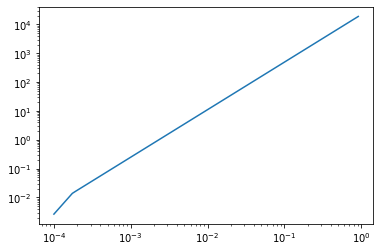

In [4]:
pl.plot(f_pbh, E_array, "-")
pl.xscale("log")
pl.yscale("log")
pl.show()

In [1]:
print("fpbh \t\t\t  T \t\t\t\t   t_c \t\t\t\t   E_Rate")
t = 14.0*u.Gyr
E_array=[]
for i in f_pbh:
    l_pbh = l(n_pbh)
    n_pbh = n(i)
    Q = (3/85)*(((c/c.value)**5)/(G**3*m1*m2*(m1+m2)))
    y_max = (((4*math.pi)/3)*n_pbh)**(-1/3)
    T = (Q*(((3*y_max)/(4*math.pi*i*(1+z_eq)))**4)).to(u.Gyr)
    t_c = (T * ((4*math.pi * i)/ 3)**(12.3)).to(u.Gyr)
    #E_Rate = (3/58) * n_pbh * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)
    #E_R = E_Rate.to(1/(u.Gpc**3 * u.yr))
    #E_array.append(E_R.value)
    #print("%.6f" %i,"|\t", T,"|\t", t_c,"|")#, E_Rate.to(1/(u.Gpc**3 * u.yr)))

fpbh 			  T 				   t_c 				   E_Rate


NameError: name 'u' is not defined

In [49]:
print("fpbh \t\t\t  T \t\t\t\t   t_c \t\t\t\t   E_Rate")
t = 14.0*u.Gyr
m1=30*const.M_sun#24.5*const.  
m2=30*const.M_sun#18.3*const.M_sun
E_array=[]
for i in f_pbh:
    l_pbh = l(n_pbh)
    n_pbh = n(i)
    Q = (3/85)*(((c/c.value)**5)/(G**3*m1*m2*(m1+m2)))
    y_max = (((4*math.pi)/3)*n_pbh)**(-1/3)
    T = (Q*(((3*y_max)/(4*math.pi*i*(1+z_eq)))**4)).to(u.Gyr)
    t_c = (T * ((4*math.pi * i)/ 3)**(12.3)).to(u.Gyr)
    if t < t_c:
        e_up = math.sqrt(1 - (t/T)**(6/37))
        E_Rate = (3/58) * n_pbh * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)
        E_R = E_Rate.to(1/(u.Gpc**3 * u.yr))
    if t >= t_c:
        e_up = math.sqrt(1 - (4*math.pi*i/3)**2 * (t/t_c)**(2/7))
        E_Rate = (3/58) * n_pbh * ((t/T)**(3/8)) * ((1 /(1 - (e_up**2))**(25/16)) - 1) * (1/t)
        E_R = E_Rate.to(1/(u.Gpc**3 * u.yr))
    E_array.append(E_R.value)
    print("%.6f" %i,"|\t", T,"|\t", t_c,"|", E_Rate.to(1/(u.Gpc**3 * u.yr)))

fpbh 			  T 				   t_c 				   E_Rate


ValueError: math domain error